In [2]:
# 匯入必要的套件
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris ,load_breast_cancer
from sklearn.model_selection import train_test_split ,StratifiedKFold ,learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 使用XGBClassifier並進行訓練
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, eta=0.1, eval_metric='merror')
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的準確率: {accuracy * 100:.2f}%")

# 輸出分類報告
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\n分類報告:")
print(report)

# 輸出混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n混淆矩陣:")
print(conf_matrix)

# StratifiedKFold

StratifiedKFold 是 sklearn 中的一個交叉驗證方法，專門用於處理分類問題。它與 KFold 相似，但它在進行資料分割時特別注重維持每個類別在每一折中的比例，這對於不平衡的資料集非常有用。

**StratifiedKFold 的特點**：

1.   類別比例不變：StratifiedKFold 確保在每一折中，每個類別的樣本比例與原始資料集中保持一致。例如，假設你有 3 個類別，每個類別的樣本數量佔比不同，StratifiedKFold 會盡量確保在每一折的訓練集與測試集中，這些類別的分佈比例是相同的。
2.   適用於分類問題：這個方法特別適合分類問題，特別是當類別分佈不平衡時，可以避免某些折中無法代表所有類別的問題。

**舉例：**


*   假設你有一個二元分類的資料集，其中 90% 的樣本屬於類別 0，而 10% 的樣本屬於類別 1。如果使用普通的 KFold，可能會出現某一折中只有類別 0 的樣本，而完全沒有類別 1，這會影響模型的訓練與評估。
*   使用 StratifiedKFold，可以確保在每一折中，類別 0 和類別 1 的樣本比例與原始資料集一致，例如，如果原始資料集中有 90% 的樣本屬於類別 0，那麼在每一折中也會保持大約 90% 的樣本屬於類別 0，10% 屬於類別 1。




In [ ]:
# 載入Iris資料集
iris = load_iris()
X = iris.data
y = iris.target

# 建立5折交叉驗證
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化XGBClassifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, eta=0.1, eval_metric='merror')

# 進行交叉驗證
fold = 1
for train_index, test_index in skf.split(X, y):
    # 切分資料
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 訓練模型
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)

    # 輸出分類報告和混淆矩陣
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 印出結果
    print(f"Fold {fold}:")
    print(f"準確率: {accuracy * 100:.2f}%")
    print("\n分類報告:")
    print(report)
    print("\n混淆矩陣:")
    print(conf_matrix)
    print("-" * 50)

    fold += 1

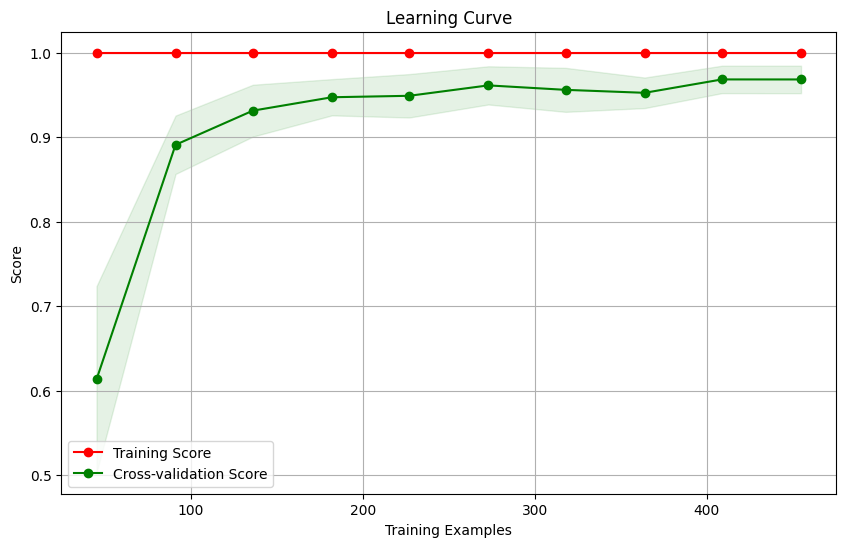

Train Sizes: [ 45  91 136 182 227 273 318 364 409 455]
Train Scores Mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Scores Mean: [0.61319671 0.89101071 0.93142369 0.94729079 0.94901413 0.96132588
 0.9560472  0.95253843 0.96839    0.96835895]


In [ ]:
# 載入較大的資料集 - Breast Cancer 資料集
data = load_breast_cancer()
X = data.data
y = data.target

# 初始化XGBClassifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, eta=0.1, eval_metric='logloss')

# Learning Curve 函數
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    # 計算學習曲線
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)

    # 計算訓練和測試分數的平均值和標準差
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 繪製學習曲線
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    # 填充區域顯示標準差
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # 繪製平均訓練分數和交叉驗證分數
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

    # 添加圖例
    plt.legend(loc="best")
    plt.show()

    # 顯示更多信息
    print("Train Sizes:", train_sizes)
    print("Train Scores Mean:", train_scores_mean)
    print("Test Scores Mean:", test_scores_mean)

# 使用5折交叉驗證繪製學習曲線
plot_learning_curve(xgb_model, X, y)

Fold 1:
準確率: 96.49%

分類報告:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


混淆矩陣:
[[41  2]
 [ 2 69]]
--------------------------------------------------


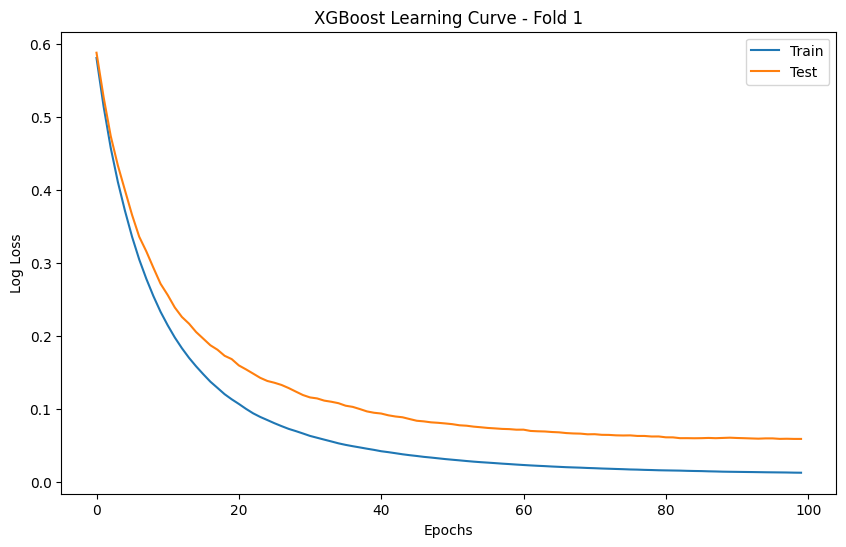

Fold 2:
準確率: 92.98%

分類報告:
              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        43
      benign       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


混淆矩陣:
[[37  6]
 [ 2 69]]
--------------------------------------------------


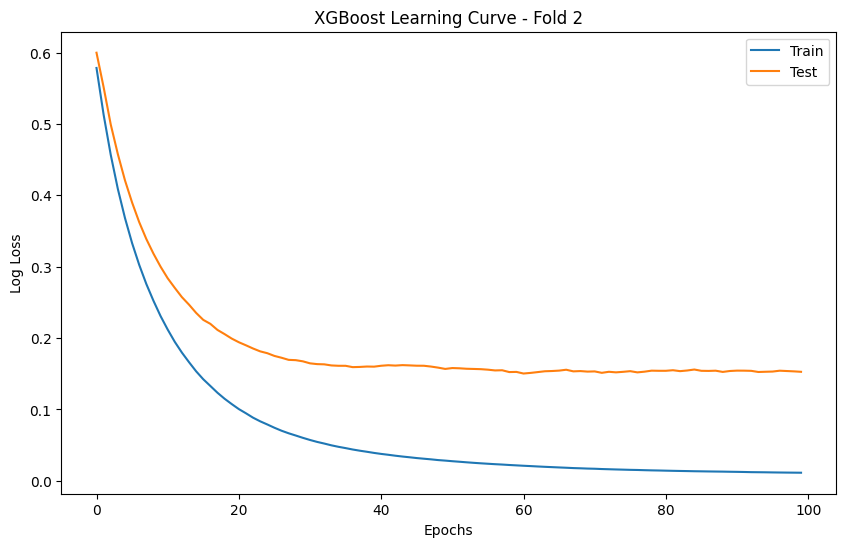

Fold 3:
準確率: 96.49%

分類報告:
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


混淆矩陣:
[[38  4]
 [ 0 72]]
--------------------------------------------------


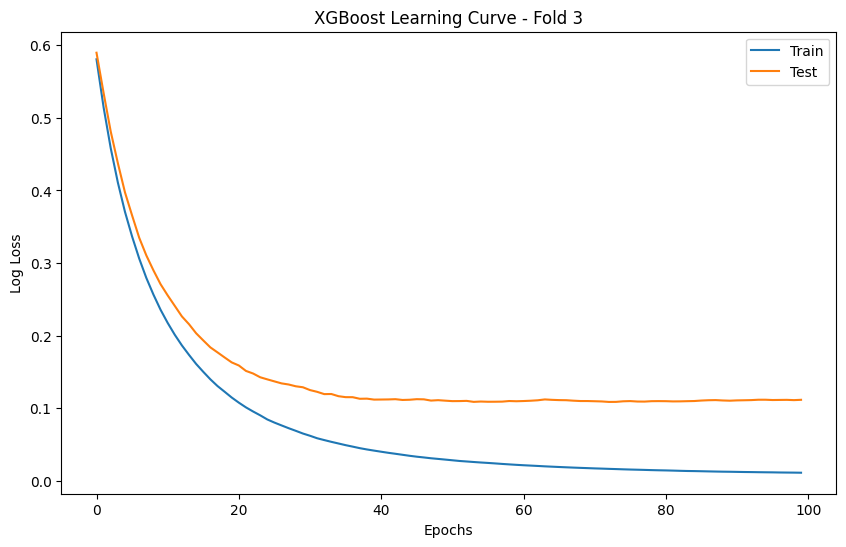

Fold 4:
準確率: 98.25%

分類報告:
              precision    recall  f1-score   support

   malignant       0.95      1.00      0.98        42
      benign       1.00      0.97      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114


混淆矩陣:
[[42  0]
 [ 2 70]]
--------------------------------------------------


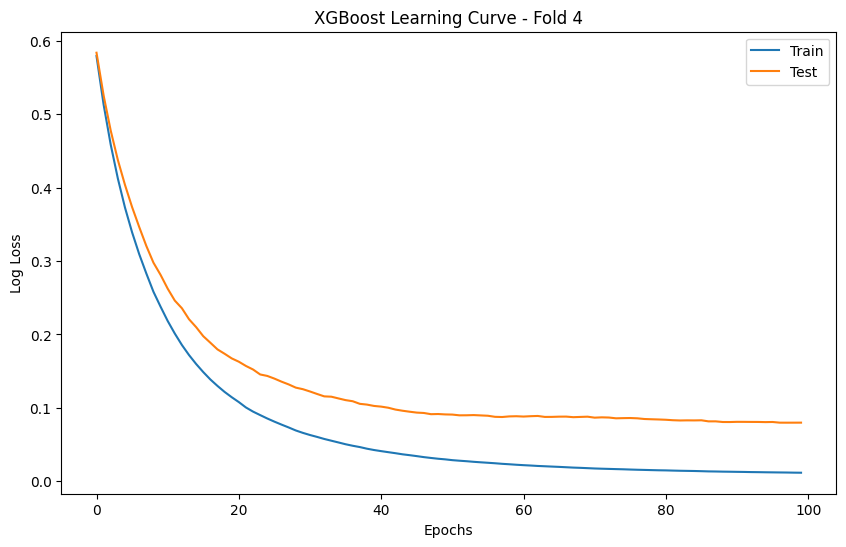

Fold 5:
準確率: 96.46%

分類報告:
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113


混淆矩陣:
[[39  3]
 [ 1 70]]
--------------------------------------------------


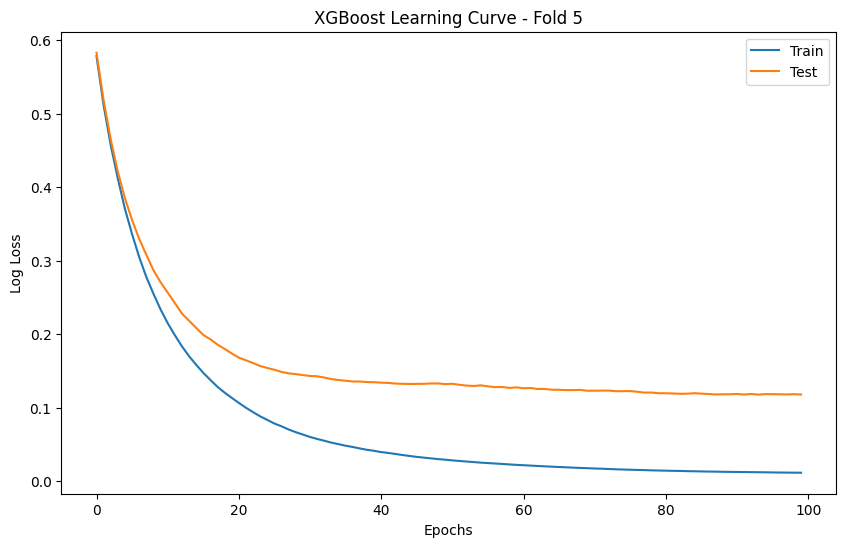

平均混淆矩陣:
[[39.4  3. ]
 [ 1.4 70. ]]


In [3]:
# 載入較大的資料集 - Breast Cancer 資料集
data = load_breast_cancer()
X = data.data
y = data.target

# 建立5折交叉驗證
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 初始化折次數和混淆矩陣列表
fold = 1
confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    # 切分資料
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 初始化XGBClassifier
    model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, eta=0.1, eval_metric='logloss')

    # 訓練模型並追蹤學習曲線
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

    # 預測
    y_pred = model.predict(X_test)

    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)

    # 輸出分類報告和混淆矩陣
    report = classification_report(y_test, y_pred, target_names=data.target_names)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 將混淆矩陣存儲到列表中
    confusion_matrices.append(conf_matrix)

    # 印出結果
    print(f"Fold {fold}:")
    print(f"準確率: {accuracy * 100:.2f}%")
    print("\n分類報告:")
    print(report)
    print("\n混淆矩陣:")
    print(conf_matrix)
    print("-" * 50)

    # 繪製學習曲線
    results = model.evals_result()
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, epochs)

    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
    plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'XGBoost Learning Curve - Fold {fold}')
    plt.show()

    fold += 1

# 計算混淆矩陣的平均值
mean_conf_matrix = np.mean(confusion_matrices, axis=0)
print("平均混淆矩陣:")
print(mean_conf_matrix)